.value_counts(),.plot(),.to_frame(),plt.bar(),sns.countplot(),px.histogram(),sns.histplot(kde=True,hue="..."),sns.rugplot(),np.percentile(),sns.lmplot(),sns.jointplot(),

[10/16/23]pd.read_csv("...",sep="\t"),from ds_utils import fetch_and_cache,import json,read text file through read_csv(),sns.scatterplot(),sns.lineplot(),.unique(),.max(),.replace(-99.99, np.NaN),plt.subplots(),.isin(),.str.startswith()


In [1]:
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


pd.set_option('display.max_rows', 80)
pd.set_option('display.width',400)
pd.set_option('display.max_columns', None)

%matplotlib inline
# the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
# directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
plt.rcParams['figure.figsize'] = (12, 9)
# This option stops scientific notation for pandas
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
covid=pd.read_csv('COVID-19_Vaccinations_in_the_United_States_County.csv')

<ipython-input-2-502639f6f4aa>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  covid=pd.read_csv('COVID-19_Vaccinations_in_the_United_States_County.csv')


In [3]:
covid.shape

(1962781, 80)

In [4]:
covid.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_5to17,Series_Complete_5to17Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Booster_Doses,Booster_Doses_Vax_Pct,Booster_Doses_5Plus,Booster_Doses_5Plus_Vax_Pct,Booster_Doses_12Plus,Booster_Doses_12Plus_Vax_Pct,Booster_Doses_18Plus,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_50Plus,Booster_Doses_50Plus_Vax_Pct,Booster_Doses_65Plus,Booster_Doses_65Plus_Vax_Pct,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_5PlusPop_Pct_SVI,Series_Complete_5to17Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_5PlusPop_Pct_UR_Equity,Series_Complete_5to17Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Booster_Doses_Vax_Pct_SVI,Booster_Doses_12PlusVax_Pct_SVI,Booster_Doses_18PlusVax_Pct_SVI,Booster_Doses_65PlusVax_Pct_SVI,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,05/10/2023,55129,19,Washburn County,WI,96.70,11123.00,70.80,11097.00,73.90,10863.00,78.50,10368.00,81.30,4749.00,95.00,10325.00,65.70,10311.00,68.70,648.00,28.80,10105.00,73.00,9663.00,75.70,4483.00,95.00,6800.00,65.90,6800.00,65.90,6754.00,66.80,6599.00,68.30,5558.00,75.60,3649.00,81.40,3538.00,63.70,2635.00,72.20,A,3.00,3.00,1.00,3.00,3.00,4.00,Non-metro,7.00,7.00,5.00,7.00,7.00,8.00,4.00,4.00,4.00,4.00,8.00,8.00,8.00,8.00,15720.00,15010.00,2252.00,13847.00,12758.00,4304.00,3978.00,26.50,3955.00,28.60,3899.00,30.60,2588.00,60.10
1,05/10/2023,19173,19,Taylor County,IA,97.30,3149.00,51.40,3145.00,55.00,3079.00,59.80,2966.00,63.30,1249.00,89.70,2951.00,48.20,2949.00,51.50,157.00,15.20,2887.00,56.00,2792.00,59.60,1211.00,87.00,1804.00,61.10,1804.00,61.20,1796.00,62.20,1774.00,63.50,1447.00,74.30,974.00,80.40,864.00,59.70,668.00,68.60,A,1.00,2.00,1.00,2.00,2.00,4.00,Non-metro,5.00,6.00,5.00,6.00,6.00,8.00,4.00,4.00,4.00,4.00,8.00,8.00,8.00,8.00,6121.00,5721.00,1034.00,5152.00,4687.00,1392.00,841.00,14.70,841.00,16.30,834.00,17.80,588.00,42.20
2,05/10/2023,36059,19,Nassau County,NY,97.50,1391226.00,95.00,1384503.00,95.00,1329779.00,95.00,1232671.00,95.00,313054.00,95.00,1179481.00,86.90,1174924.00,91.60,133132.00,61.40,1127179.00,95.00,1041792.00,95.00,268167.00,95.00,548555.00,46.50,548367.00,46.70,540617.00,48.00,514670.00,49.40,319930.00,57.70,168258.00,62.70,140803.00,44.00,88821.00,52.80,B,8.00,8.00,8.00,8.00,8.00,8.00,Metro,4.00,4.00,4.00,4.00,4.00,4.00,7.00,7.00,7.00,6.00,3.00,3.00,3.00,2.00,1356924.00,1282825.00,216857.00,1169773.00,1065968.00,246690.00,236202.00,18.40,231748.00,19.80,224931.00,21.10,109947.00,44.60
3,05/10/2023,48281,19,Lampasas County,TX,98.90,11678.00,54.50,11660.00,57.40,11468.00,61.90,10849.00,64.60,3920.00,90.70,10007.00,46.70,9999.00,49.20,669.00,19.00,9845.00,53.20,9330.00,55.50,3448.00,79.80,4

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962781 entries, 0 to 1962780
Data columns (total 80 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   Date                                     object 
 1   FIPS                                     object 
 2   MMWR_week                                int64  
 3   Recip_County                             object 
 4   Recip_State                              object 
 5   Completeness_pct                         float64
 6   Administered_Dose1_Recip                 float64
 7   Administered_Dose1_Pop_Pct               float64
 8   Administered_Dose1_Recip_5Plus           float64
 9   Administered_Dose1_Recip_5PlusPop_Pct    float64
 10  Administered_Dose1_Recip_12Plus          float64
 11  Administered_Dose1_Recip_12PlusPop_Pct   float64
 12  Administered_Dose1_Recip_18Plus          float64
 13  Administered_Dose1_Recip_18PlusPop_Pct   float64
 14  Administered_Dose1

## Converting Object datatype to Datetime

In [6]:
# covid_rename = covid.rename(columns={"Recip_County": "County", "Series_Complete_Pop_Pct": "Vaccination_Complete_Pct",
#                                      "Recip_State":"State"})

In [7]:
covid['Date']=pd.to_datetime(covid['Date'],format="%m/%d/%Y")

In [8]:
covid['FIPS'].value_counts()

UNK      34829
17123      597
21191      597
48481      597
51109      597
         ...  
5079         1
6093         1
6013         1
40131        1
54073        1
Name: FIPS, Length: 6449, dtype: int64

In [9]:
covid['FIPS'] = covid['FIPS'].astype('object')
covid['FIPS'] = covid['FIPS'].apply(lambda x: str(x) if isinstance(x, int) else x)
covid['FIPS'] = covid['FIPS'].astype('str')


def add_zero_prefix(value):
    if len(value) == 4:
        return '0' + value
    else:
        return value

# Apply the function to the 'Column1'
covid['FIPS'] = covid['FIPS'].apply(add_zero_prefix)

print("\nDataFrame with '0' added to values of length 4:")
# print(covid.info())


DataFrame with '0' added to values of length 4:


In [10]:
covid['FIPS'].value_counts()

UNK      34829
55129      598
55063      598
22035      598
01089      598
         ...  
09011      598
18149      598
32003      598
28095      598
12113      598
Name: FIPS, Length: 3225, dtype: int64

# Missing Values in each Attribute/Feature

In [11]:
cov_missing_values=covid.isnull().sum()
print(cov_missing_values)

Date                                             0
FIPS                                             0
MMWR_week                                        0
Recip_County                                     0
Recip_State                                     81
Completeness_pct                              5673
Administered_Dose1_Recip                     58287
Administered_Dose1_Pop_Pct                   24085
Administered_Dose1_Recip_5Plus             1215611
Administered_Dose1_Recip_5PlusPop_Pct      1210831
Administered_Dose1_Recip_12Plus             117580
Administered_Dose1_Recip_12PlusPop_Pct       48598
Administered_Dose1_Recip_18Plus              99383
Administered_Dose1_Recip_18PlusPop_Pct       30202
Administered_Dose1_Recip_65Plus              99278
Administered_Dose1_Recip_65PlusPop_Pct       30097
Series_Complete_Yes                           6266
Series_Complete_Pop_Pct                      14887
Series_Complete_5Plus                      1186856
Series_Complete_5PlusPop_Pct   

### Percentage of Missing Values in each Attribute/Feature

In [12]:
# df1['day'].value_counts()/df1['day'].value_counts().sum()*100
cov_missing_values/covid.shape[0] * 100

Date                                       0.00
FIPS                                       0.00
MMWR_week                                  0.00
Recip_County                               0.00
Recip_State                                0.00
Completeness_pct                           0.29
Administered_Dose1_Recip                   2.97
Administered_Dose1_Pop_Pct                 1.23
Administered_Dose1_Recip_5Plus            61.93
Administered_Dose1_Recip_5PlusPop_Pct     61.69
Administered_Dose1_Recip_12Plus            5.99
Administered_Dose1_Recip_12PlusPop_Pct     2.48
Administered_Dose1_Recip_18Plus            5.06
Administered_Dose1_Recip_18PlusPop_Pct     1.54
Administered_Dose1_Recip_65Plus            5.06
Administered_Dose1_Recip_65PlusPop_Pct     1.53
Series_Complete_Yes                        0.32
Series_Complete_Pop_Pct                    0.76
Series_Complete_5Plus                     60.47
Series_Complete_5PlusPop_Pct              60.91
Series_Complete_5to17                   

## Dropping unwanted rows/records [row with little to no value because of null values]

In [13]:
covid[covid['Recip_County']=='Unknown County'].isnull().sum()

Date                                           0
FIPS                                           0
MMWR_week                                      0
Recip_County                                   0
Recip_State                                   81
Completeness_pct                            1055
Administered_Dose1_Recip                    1408
Administered_Dose1_Pop_Pct                  8475
Administered_Dose1_Recip_5Plus             21493
Administered_Dose1_Recip_5PlusPop_Pct      29193
Administered_Dose1_Recip_12Plus             3382
Administered_Dose1_Recip_12PlusPop_Pct      8880
Administered_Dose1_Recip_18Plus             3176
Administered_Dose1_Recip_18PlusPop_Pct      8475
Administered_Dose1_Recip_65Plus             3176
Administered_Dose1_Recip_65PlusPop_Pct      8475
Series_Complete_Yes                          274
Series_Complete_Pop_Pct                     8475
Series_Complete_5Plus                      20992
Series_Complete_5PlusPop_Pct               29193
Series_Complete_5to1

In [14]:
covid[covid['FIPS']=='UNK'].isnull().sum()

Date                                           0
FIPS                                           0
MMWR_week                                      0
Recip_County                                   0
Recip_State                                   81
Completeness_pct                            1055
Administered_Dose1_Recip                    1408
Administered_Dose1_Pop_Pct                  8475
Administered_Dose1_Recip_5Plus             21493
Administered_Dose1_Recip_5PlusPop_Pct      29193
Administered_Dose1_Recip_12Plus             3382
Administered_Dose1_Recip_12PlusPop_Pct      8880
Administered_Dose1_Recip_18Plus             3176
Administered_Dose1_Recip_18PlusPop_Pct      8475
Administered_Dose1_Recip_65Plus             3176
Administered_Dose1_Recip_65PlusPop_Pct      8475
Series_Complete_Yes                          274
Series_Complete_Pop_Pct                     8475
Series_Complete_5Plus                      20992
Series_Complete_5PlusPop_Pct               29193
Series_Complete_5to1

In [15]:
# by paying attention we can see that the records where FIPS value is UNK,
# Recip County's values are also Unknown County,
# So we can drop them as they are barely useful and these records are of 1.5% of total records
covid=covid[covid['FIPS']!='UNK']

In [16]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927952 entries, 0 to 1962780
Data columns (total 80 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   Date                                     datetime64[ns]
 1   FIPS                                     object        
 2   MMWR_week                                int64         
 3   Recip_County                             object        
 4   Recip_State                              object        
 5   Completeness_pct                         float64       
 6   Administered_Dose1_Recip                 float64       
 7   Administered_Dose1_Pop_Pct               float64       
 8   Administered_Dose1_Recip_5Plus           float64       
 9   Administered_Dose1_Recip_5PlusPop_Pct    float64       
 10  Administered_Dose1_Recip_12Plus          float64       
 11  Administered_Dose1_Recip_12PlusPop_Pct   float64       
 12  Administered_Dose1_Recip_18P

In [17]:
# 1927952 entries, 0 to 1962780
# After dropping the rows with unkown counties in values the no of records are 1927952
# but the indexing is beyond 1962780
# To address this lets reindex the dataframe

#

In [18]:
covid.reset_index(inplace=True)
covid.drop(columns='index',inplace=True)

## Dropping unwanted Columns/attributes [columns with little to no value because of null values]

In [19]:
covid.isnull().sum()/covid.shape[0] * 100

Date                                       0.00
FIPS                                       0.00
MMWR_week                                  0.00
Recip_County                               0.00
Recip_State                                0.00
Completeness_pct                           0.24
Administered_Dose1_Recip                   2.95
Administered_Dose1_Pop_Pct                 0.81
Administered_Dose1_Recip_5Plus            61.94
Administered_Dose1_Recip_5PlusPop_Pct     61.29
Administered_Dose1_Recip_12Plus            5.92
Administered_Dose1_Recip_12PlusPop_Pct     2.06
Administered_Dose1_Recip_18Plus            4.99
Administered_Dose1_Recip_18PlusPop_Pct     1.13
Administered_Dose1_Recip_65Plus            4.98
Administered_Dose1_Recip_65PlusPop_Pct     1.12
Series_Complete_Yes                        0.31
Series_Complete_Pop_Pct                    0.33
Series_Complete_5Plus                     60.47
Series_Complete_5PlusPop_Pct              60.49
Series_Complete_5to17                   

## Dividing Dataset into Categorical and Numerical Datasets for Basic analysis

In [20]:
covid_categorical=covid.loc[:,['FIPS','Recip_County','Recip_State','Metro_status','SVI_CTGY']]

In [21]:
covid_categorical

,FIPS,Recip_County,Recip_State,Metro_status,SVI_CTGY
0,55129,Washburn County,WI,Non-metro,A
1,19173,Taylor County,IA,Non-metro,A
2,36059,Nassau County,NY,Metro,B
3,48281,Lampasas County,TX,Metro,C
4,26145,Saginaw County,MI,Metro,C
...,...,...,...,...,...
1927947,39001,Adams County,OH,Non-metro,D
1927948,18061,Harrison County,IN,Metro,A
1927949,48321,Matagorda County,TX,Non-metro,D
1927950,54073,Pleasants County,WV,Non-metro,B


In [22]:
covid_categorical.nunique()

FIPS            3224
Recip_County    1959
Recip_State       54
Metro_status       2
SVI_CTGY           4
dtype: int64

In [23]:
covid_categorical['Recip_State'].unique()

array(['WI', 'IA', 'NY', 'TX', 'MI', 'GA', 'FL', 'IL', 'TN', 'VT', 'LA',
       'MN', 'IN', 'MO', 'NE', 'VA', 'CO', 'KY', 'WA', 'OK', 'AR', 'MS',
       'PR', 'OH', 'PA', 'WV', 'UT', 'KS', 'NM', 'MT', 'NC', 'CA', 'SC',
       'MA', 'ND', 'NJ', 'AK', 'OR', 'AL', 'SD', 'WY', 'MD', 'ID', 'CT',
       'NV', 'RI', 'ME', 'NH', 'VI', 'AZ', 'DE', 'HI', 'GU', 'DC'],
      dtype=object)

In [24]:
covid_categorical['SVI_CTGY'].value_counts().to_frame()

,SVI_CTGY
A,481967
D,481411
B,480813
C,480792


In [25]:
covid_numerical=covid.drop(['FIPS','Recip_County','Recip_State','Metro_status','SVI_CTGY'],axis=1)

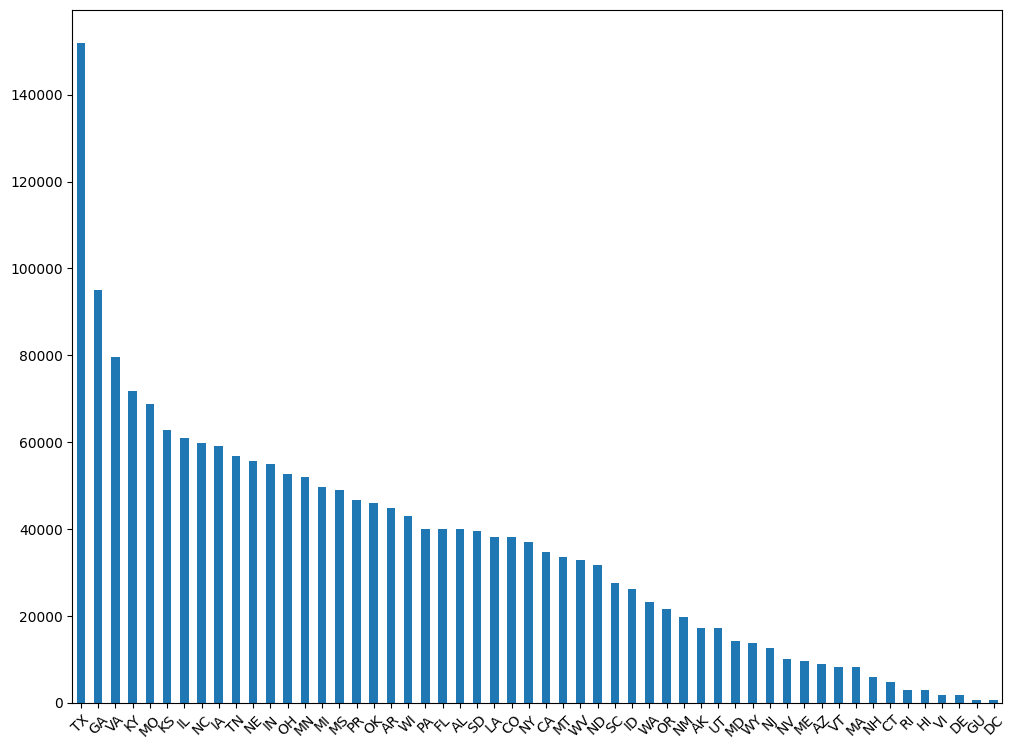

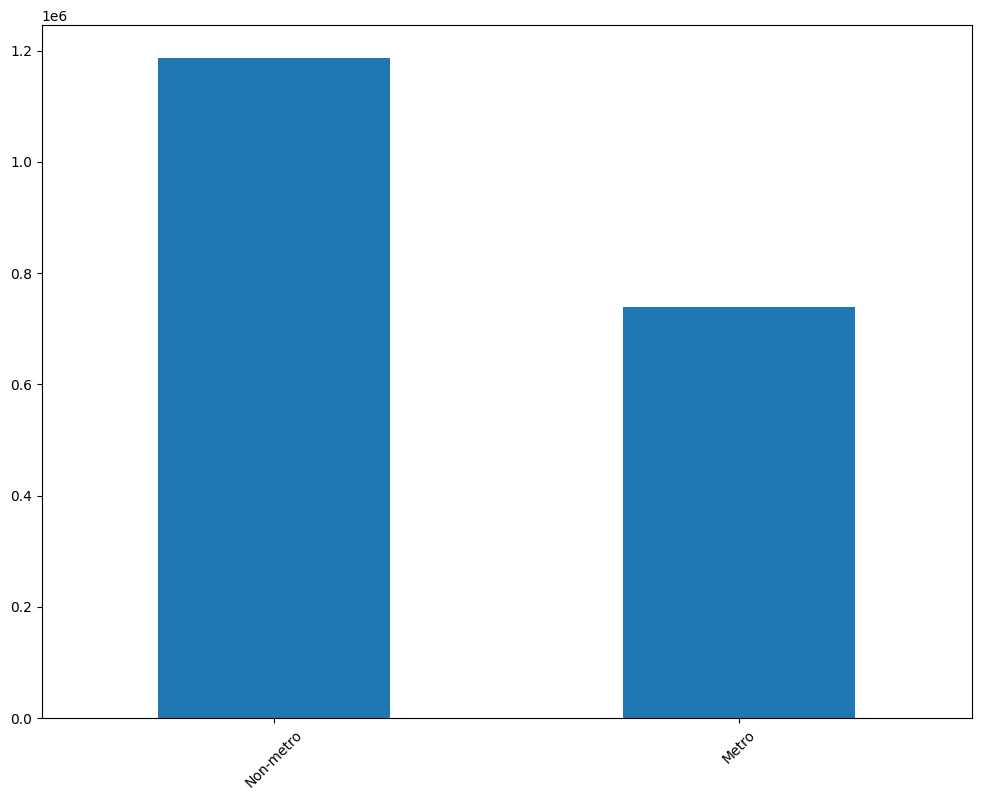

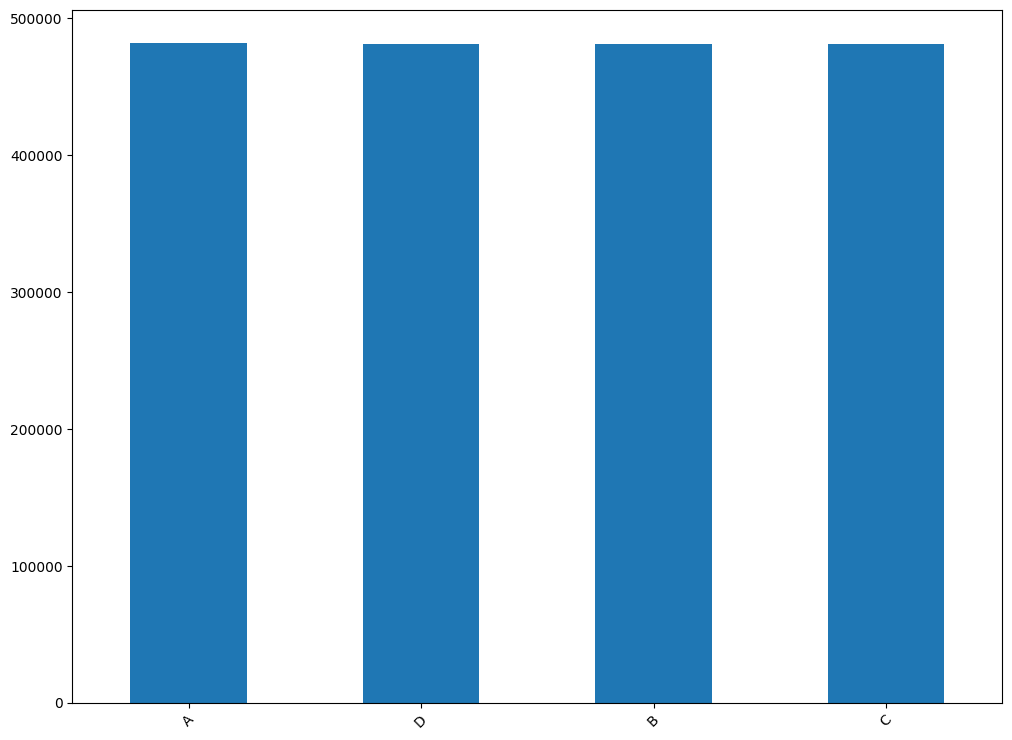

In [26]:
for i in range(2,5):
    covid_categorical.iloc[:,i].value_counts().plot(kind='bar')
    plt.xticks(rotation=45)
    plt.show()

In [27]:
# Code to print two figures side by side#

# fig,axes = plt.subplots(1,2,figsize=(10,5))
# df1['day'].value_counts().plot(kind='pie',ax=axes[0],autopct='%1.2f')
# df1['day'].value_counts().plot(kind='bar',ax=axes[1])
# plt.show()

In [69]:
covid[covid['FIPS']=='56039']

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_5to17,Series_Complete_5to17Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Booster_Doses,Booster_Doses_Vax_Pct,Booster_Doses_5Plus,Booster_Doses_5Plus_Vax_Pct,Booster_Doses_12Plus,Booster_Doses_12Plus_Vax_Pct,Booster_Doses_18Plus,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_50Plus,Booster_Doses_50Plus_Vax_Pct,Booster_Doses_65Plus,Booster_Doses_65Plus_Vax_Pct,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_5PlusPop_Pct_SVI,Series_Complete_5to17Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_5PlusPop_Pct_UR_Equity,Series_Complete_5to17Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Booster_Doses_Vax_Pct_SVI,Booster_Doses_12PlusVax_Pct_SVI,Booster_Doses_18PlusVax_Pct_SVI,Booster_Doses_65PlusVax_Pct_SVI,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
3167,2023-05-10,56039,19,Teton County,WY,97.10,26716.00,95.00,26464.00,95.00,25379.00,95.00,23916.00,95.00,4595.00,95.00,22802.00,95.00,22659.00,95.00,2336.00,76.10,21651.00,95.00,20323.00,95.00,3913.00,95.00,11768.00,51.60,11767.00,51.90,11502.00,53.10,10982.00,54.00,5972.00,68.70,3074.00,78.60,3426.00,57.40,2026.00,65.90,A,4.00,4.00,4.00,4.00,4.00,4.00,Non-metro,8.00,8.00,8.00,8.00,8.00,8.00,4.00,4.00,4.00,3.00,8.00,8.00,8.00,7.00,23464.00,22334.00,3070.00,20665.00,19264.00,3717.00,5788.00,25.90,5597.00,27.10,5399.00,28.00,2115.00,56.90
3431,2023-05-03,56039,18,Teton County,WY,97.10,26707.00,95.00,26455.00,95.00,25370.00,95.00,23907.00,95.00,4594.00,95.00,22795.00,95.00,22652.00,95.00,2334.00,76.00,21646.00,95.00,20318.00,95.00,3911.00,95.00,11760.00,51.60,11759.00,51.90,11495.00,53.10,10977.00,54.00,5969.00,68.70,3072.00,78.50,3419.00,57.30,2022.00,65.80,A,4.00,4.00,4.00,4.00,4.00,4.00,Non-metro,8.00,8.00,8.00,8.00,8.00,8.00,4.00,4.00,4.00,3.00,8.00,8.00,8.00,7.00,23464.00,22334.00,3070.00,20665.00,19264.00,3717.00,5697.00,25.50,5507.00,26.60,5311.00,27.60,2051.00,55.20
8535,2023-04-26,56039,17,Teton County,WY,97.10,26706.00,95.00,26454.00,95.00,25369.00,95.00,23906.00,95.00,4593.00,95.00,22795.00,95.00,22652.00,95.00,2334.00,76.00,21646.00,95.00,20318.00,95.00,3911.00,95.00,11760.00,51.60,11759.00,51.90,11495.00,53.10,10977.00,54.00,5969.00,68.70,3072.00,78.50,3413.00,57.20,2016.00,65.60,A,4.00,4.00,4.00,4.00,4.00,4.00,Non-metro,8.00,8.00,8.00,8.00,8.00,8.00,4.00,4.00,4.00,3.00,8.00,8.00,8.00,7.00,23464.00,22334.00,3070.00,20665.00,19264.00,3717.00,5691.00,25.50,5501.00,26.60,5305.00,27.50,2045.00,55.00
11945,2023-04-19,56039,16,Teton County,WY,97.10,26704.00,95.00,26452.00,95.00,25369.00,95.00,23906.00,95.00,4593.00,95.00,22793.00,95.00,22650.00,95.00,2333.00,76.00,21645.00,95.00,20317.00,95.00,3911.00,95.00,11757.00,51

## Visualization

<ipython-input-28-27b6221d69cc>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=covid_numerical['Date'],y=covid_numerical['Completeness_pct'], palette="tab10", linewidth=2.5)


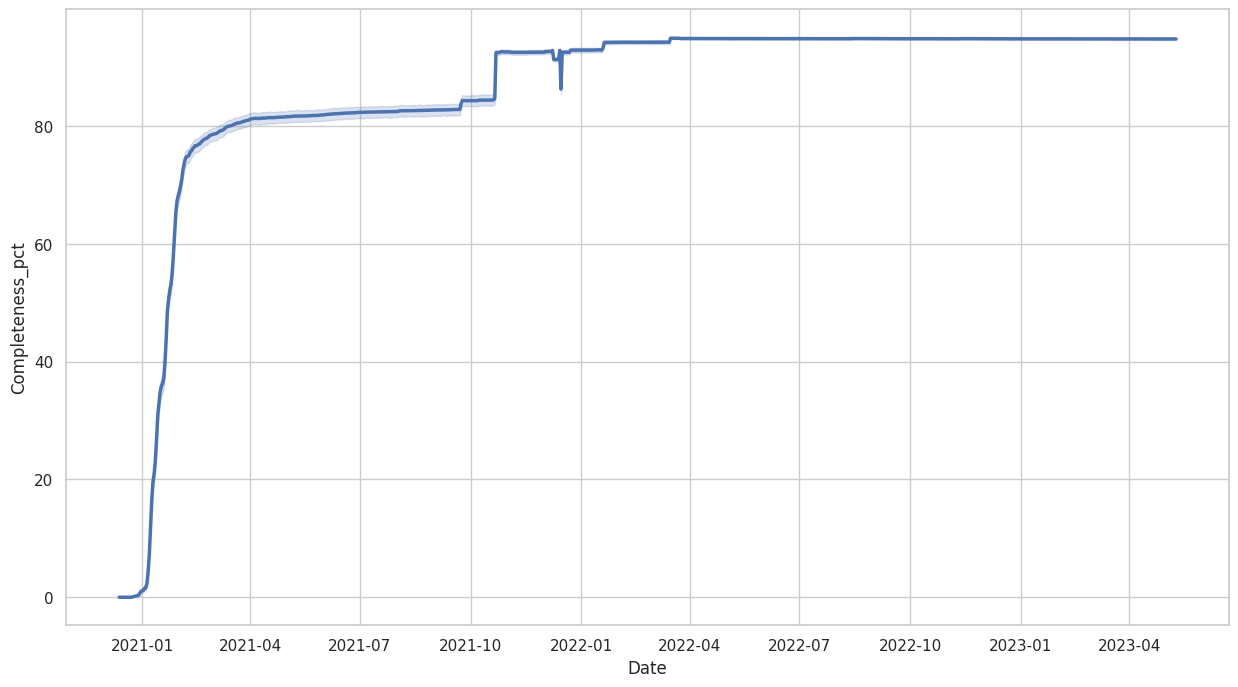

In [28]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
# data = data.rolling(7).mean()
sns.lineplot(x=covid_numerical['Date'],y=covid_numerical['Completeness_pct'], palette="tab10", linewidth=2.5)
plt.show()

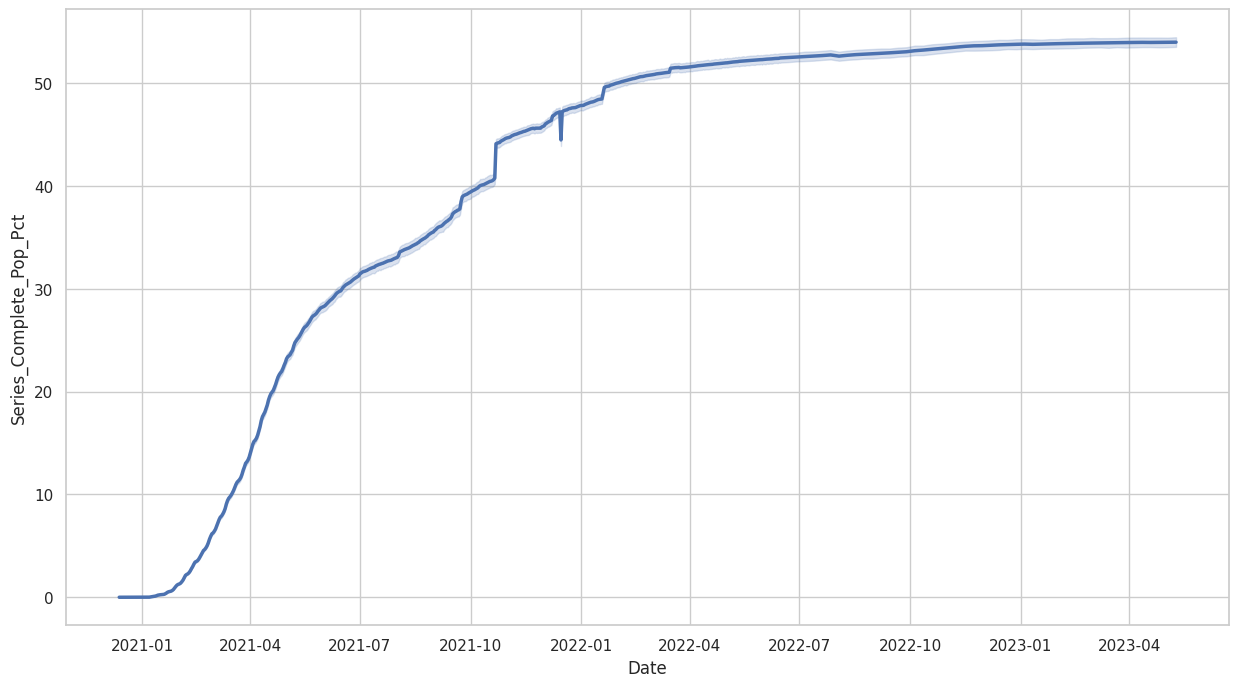

In [29]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,8))
# data = data.rolling(7).mean()
sns.lineplot(x=covid_numerical['Date'],y=covid_numerical['Series_Complete_Pop_Pct'], linewidth=2.5)
plt.show()

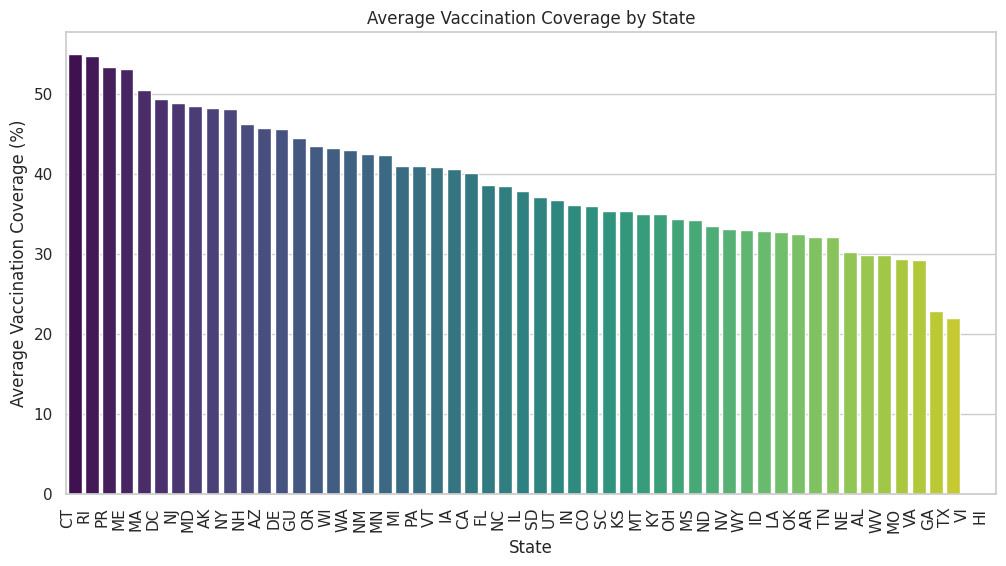

In [30]:
state_coverage = covid.groupby('Recip_State')['Series_Complete_Pop_Pct'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_coverage.index, y=state_coverage.values, palette='viridis')
plt.title('Average Vaccination Coverage by State')
plt.xlabel('State')
plt.ylabel('Average Vaccination Coverage (%)')
plt.xticks(rotation=90, ha='right')
plt.show()


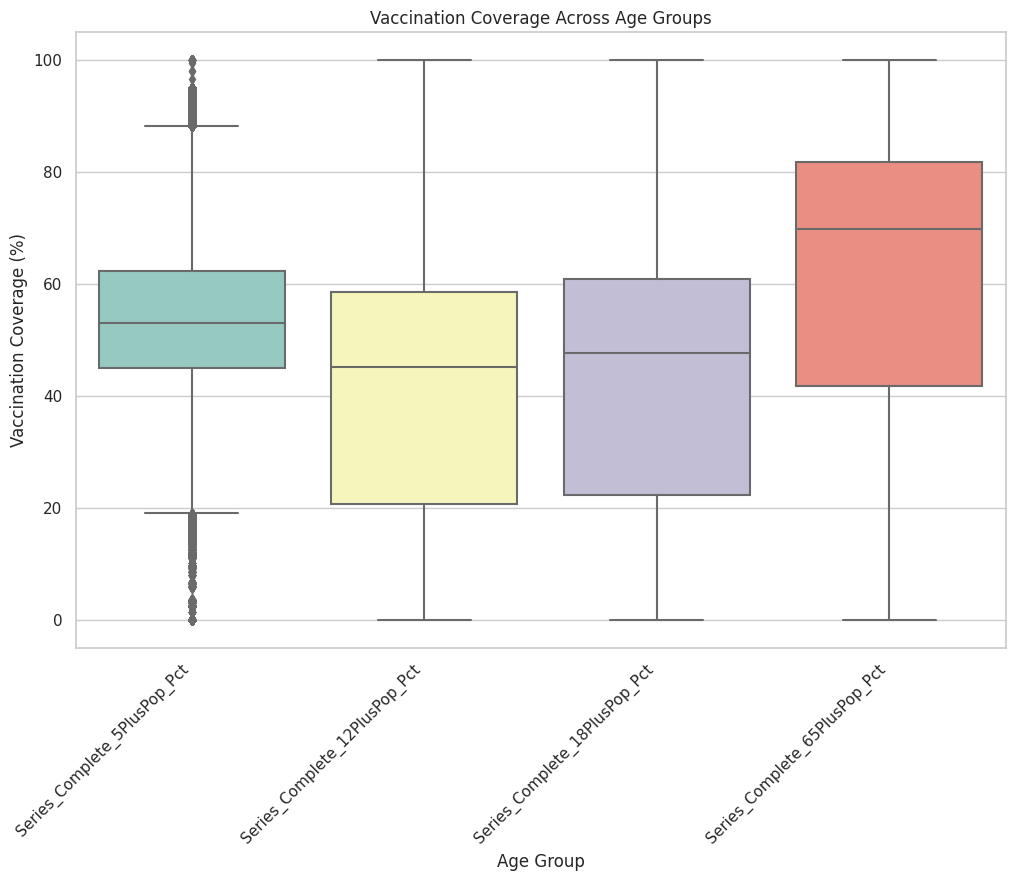

In [31]:
age_group_columns = ['Series_Complete_5PlusPop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct', 'Series_Complete_65PlusPop_Pct']
age_group_data = covid[age_group_columns]

plt.figure(figsize=(12, 8))
sns.boxplot(data=age_group_data, palette='Set3')
plt.title('Vaccination Coverage Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Vaccination Coverage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


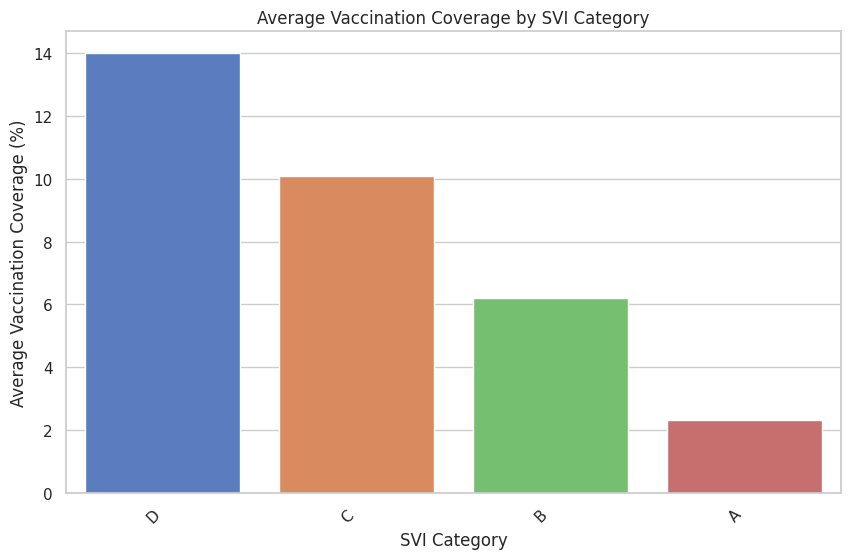

In [32]:
svu_categories = covid.groupby('SVI_CTGY')['Series_Complete_Pop_Pct_SVI'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=svu_categories.index, y=svu_categories.values, palette='muted')
plt.title('Average Vaccination Coverage by SVI Category')
plt.xlabel('SVI Category')
plt.ylabel('Average Vaccination Coverage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
grouped_covid = covid.groupby(['FIPS','Recip_County'],dropna=True).agg({'Series_Complete_Pop_Pct': 'mean', 'Completeness_pct': 'mean'})
grouped_covid.reset_index(inplace=True)

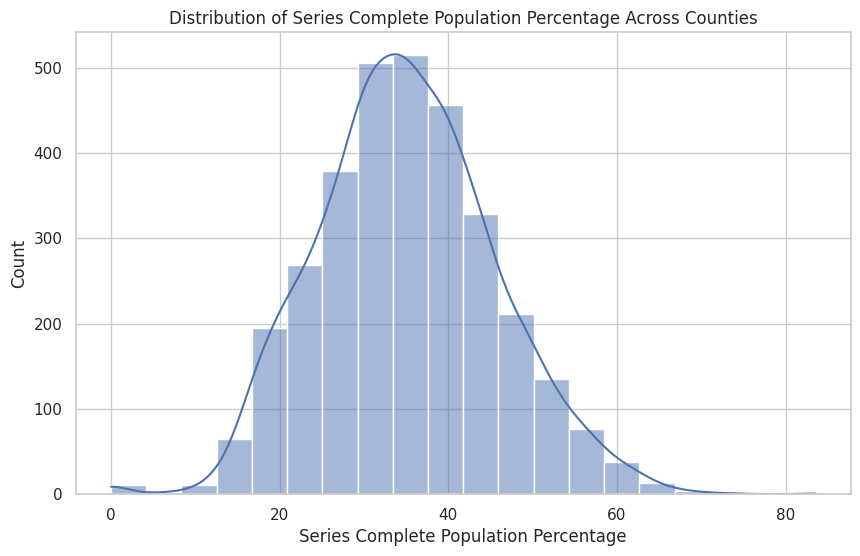

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(grouped_covid['Series_Complete_Pop_Pct'], bins=20, kde=True)
plt.xlabel('Series Complete Population Percentage')
plt.ylabel('Count')
plt.title('Distribution of Series Complete Population Percentage Across Counties')
plt.show()

In [35]:
temp_df=covid[["Metro_status","Series_Complete_Pop_Pct"]]
temp_df=temp_df.dropna()

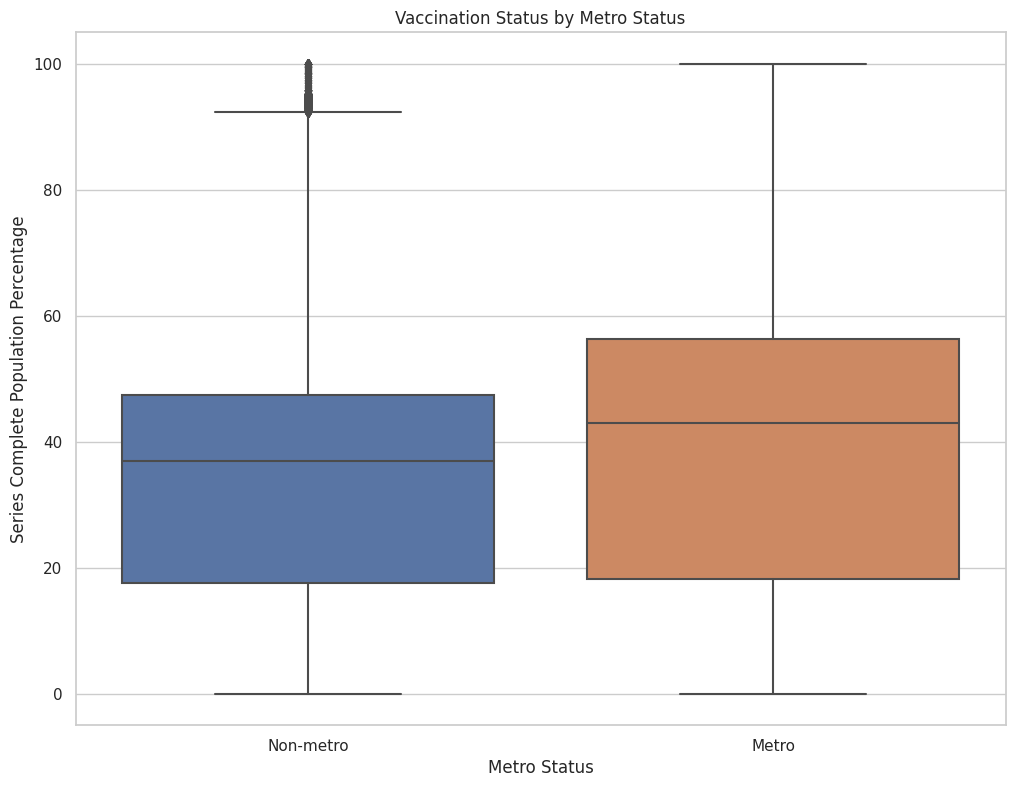

In [36]:
sns.boxplot(x='Metro_status', y='Series_Complete_Pop_Pct', data=temp_df)
plt.title('Vaccination Status by Metro Status')
plt.xlabel('Metro Status')
plt.ylabel('Series Complete Population Percentage')
plt.show()

In [37]:
grouped_covid = covid.groupby(['FIPS','Recip_County'],dropna=True).agg('mean')
grouped_covid.reset_index(inplace=True)

<ipython-input-37-1d8bfc28d919>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_covid = covid.groupby(['FIPS','Recip_County'],dropna=True).agg('mean')


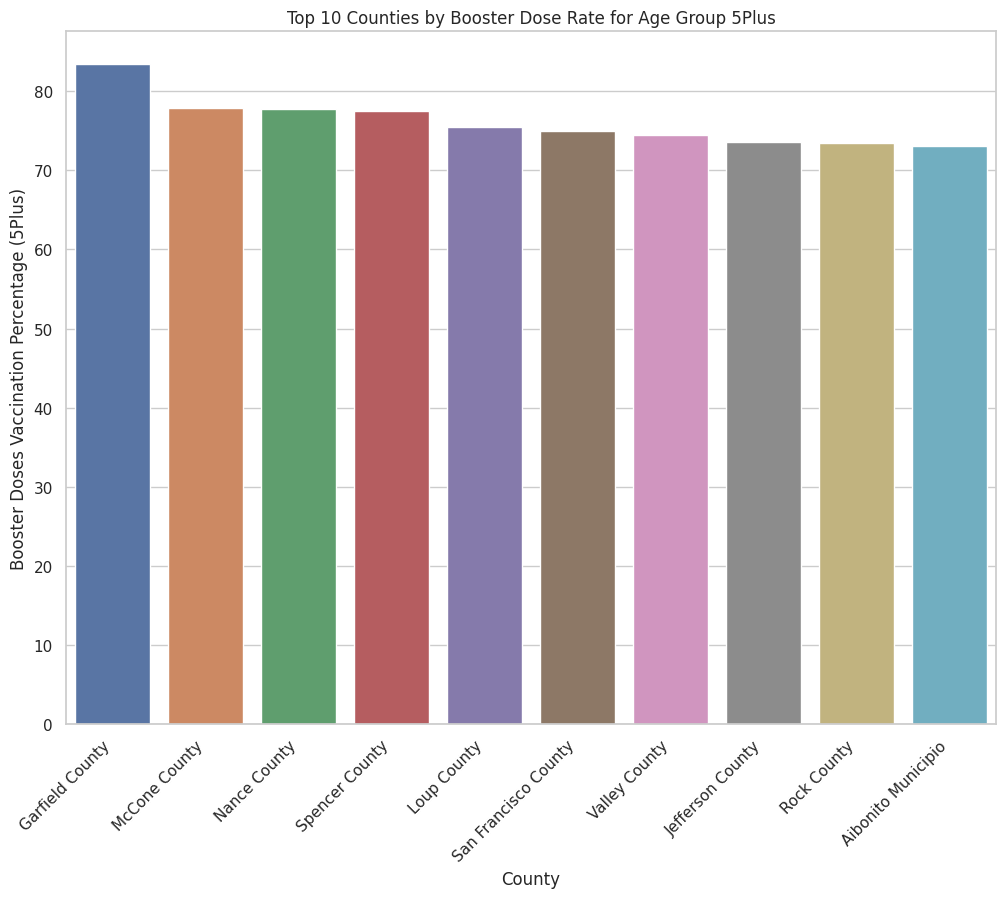

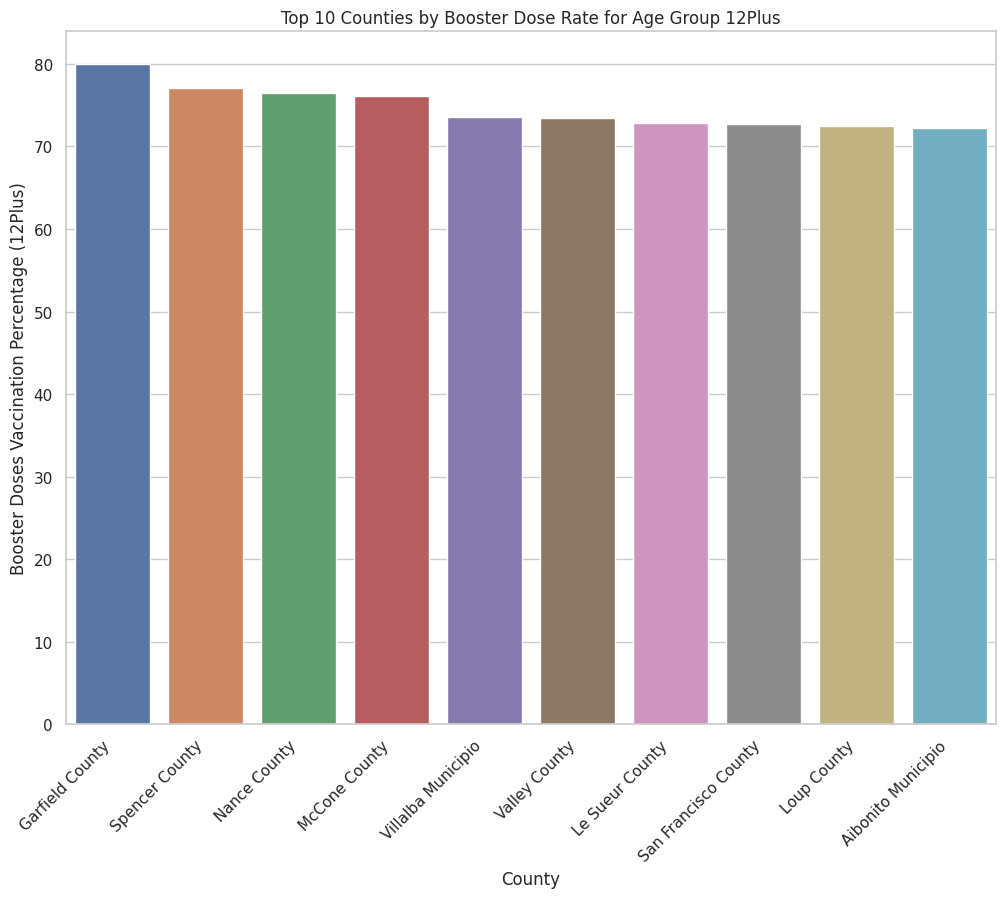

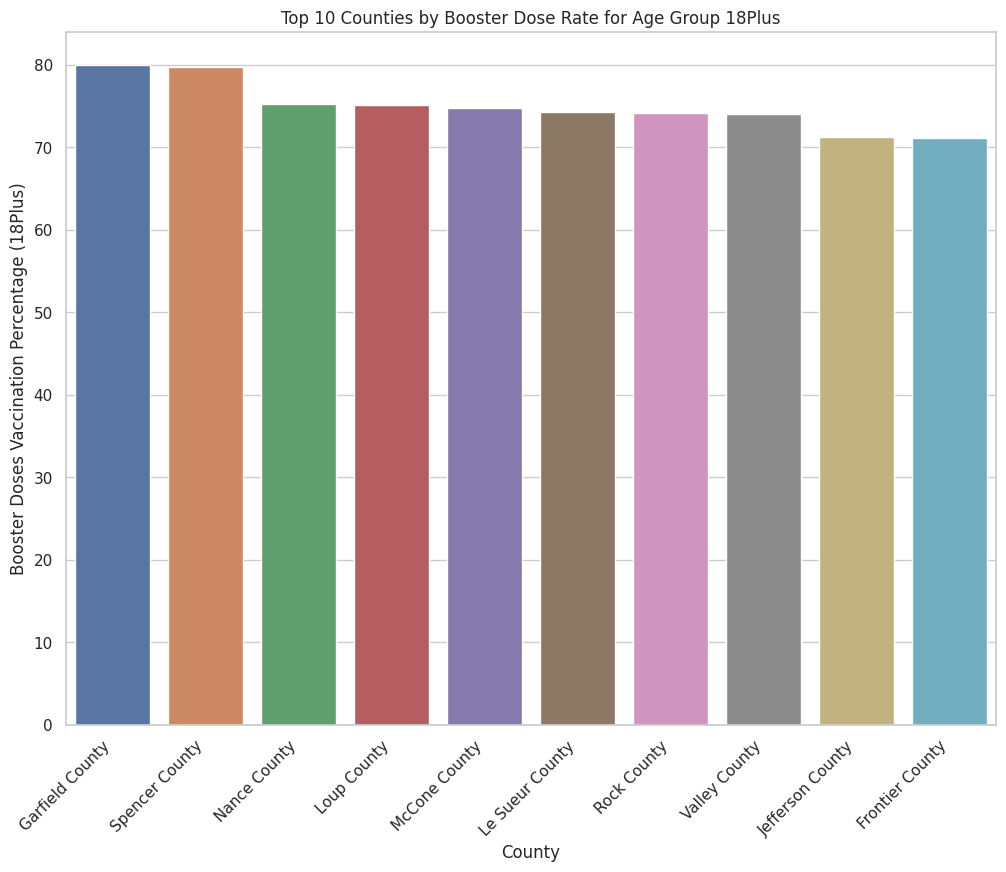

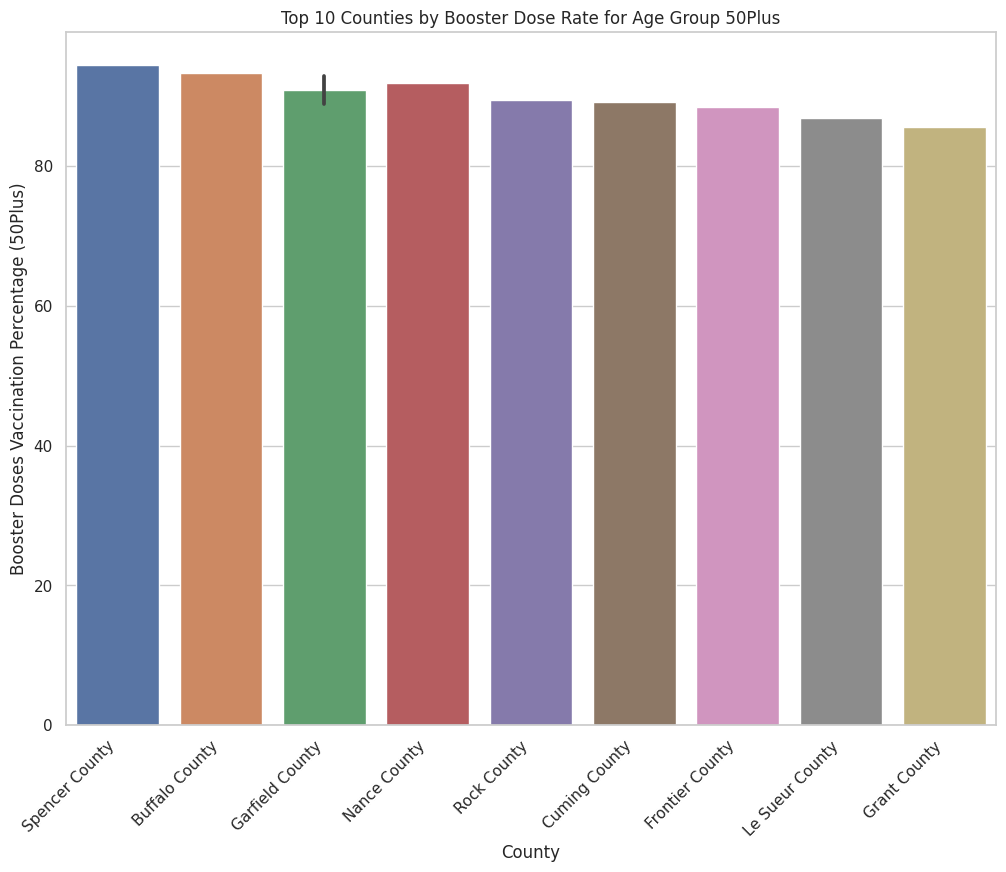

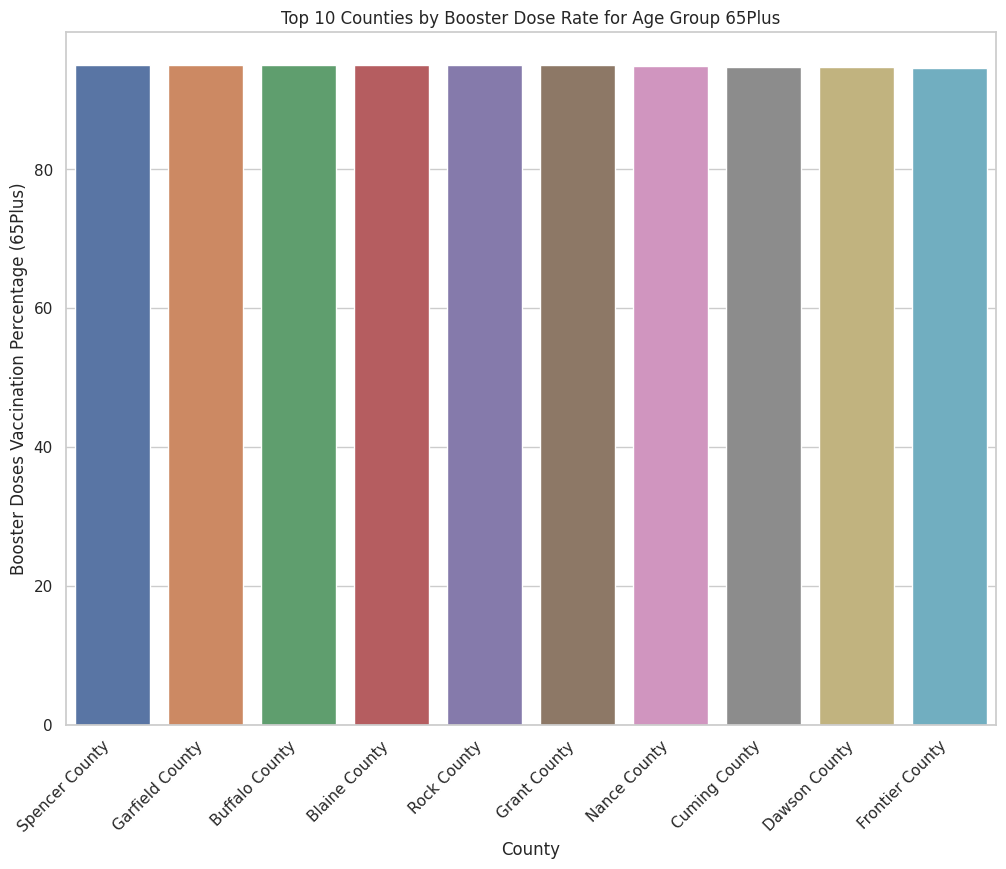

In [38]:
booster_age_groups = ['5Plus', '12Plus', '18Plus', '50Plus', '65Plus']
for age_group in booster_age_groups:
    sns.barplot(x=f'Recip_County', y=f'Booster_Doses_{age_group}_Vax_Pct', data=grouped_covid.sort_values(f'Booster_Doses_{age_group}_Vax_Pct', ascending=False).head(10))
    plt.title(f'Top 10 Counties by Booster Dose Rate for Age Group {age_group}')
    plt.xlabel('County')
    plt.ylabel(f'Booster Doses Vaccination Percentage ({age_group})')
    plt.xticks(rotation=45, ha='right')
    plt.show()

## Hesitency Dataset

In [44]:
Vac_Hesitancy = pd.read_csv('/content/Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates_20231113.csv')

In [45]:
Vac_Hesitancy.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.18,0.24,0.14,0.89,Very High Vulnerability,0.64,High Concern,0.30,0.02,0.00,0.00,0.27,0.00,0.69,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.841259 33.104456, -85.8409...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1121,"Talladega County, Alabama",ALABAMA,0.18,0.23,0.14,0.87,Very High Vulnerability,0.84,Very High Concern,0.27,0.02,0.00,0.01,0.32,0.00,0.63,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-86.303069 33.46316, -86.30306...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1131,"Wilcox County, Alabama",ALABAMA,0.17,0.24,0.13,0.93,Very High Vulnerability,0.94,Very High Concern,0.39,0.01,0.00,0.00,0.69,0.00,0.27,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,1129,"Washington County, Alabama",ALABAMA,0.17,0.24,0.13,0.73,High Vulnerability,0.82,Very High Concern,0.31,0.01,0.07,0.00,0.24,0.00,0.65,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,1119,"Sumter County, Alabama",ALABAMA,0.18,0.25,0.14,0.96,Very High Vulnerability,0.96,Very High Concern,0.36,0.01,0.00,0.02,0.72,0.00,0.25,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.369055 32.742584, -88.3685...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."


In [46]:
Vac_Hesitancy['FIPS Code'] = Vac_Hesitancy['FIPS Code'].astype('object')
Vac_Hesitancy['FIPS Code'] = Vac_Hesitancy['FIPS Code'].apply(lambda x: str(x) if isinstance(x, int) else x)
Vac_Hesitancy['FIPS Code'] = Vac_Hesitancy['FIPS Code'].astype('str')


def add_zero_prefix(value):
    if len(value) == 4:
        return '0' + value
    else:
        return value

# Apply the function to the 'Column1'
Vac_Hesitancy['FIPS Code'] = Vac_Hesitancy['FIPS Code'].apply(add_zero_prefix)

print("\nDataFrame with '0' added to values of length 4:")
# print(covid.info())


DataFrame with '0' added to values of length 4:


In [47]:
Vac_Hesitancy.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,01123,"Tallapoosa County, Alabama",ALABAMA,0.18,0.24,0.14,0.89,Very High Vulnerability,0.64,High Concern,0.30,0.02,0.00,0.00,0.27,0.00,0.69,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.841259 33.104456, -85.8409...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,01121,"Talladega County, Alabama",ALABAMA,0.18,0.23,0.14,0.87,Very High Vulnerability,0.84,Very High Concern,0.27,0.02,0.00,0.01,0.32,0.00,0.63,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-86.303069 33.46316, -86.30306...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,01131,"Wilcox County, Alabama",ALABAMA,0.17,0.24,0.13,0.93,Very High Vulnerability,0.94,Very High Concern,0.39,0.01,0.00,0.00,0.69,0.00,0.27,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,01129,"Washington County, Alabama",ALABAMA,0.17,0.24,0.13,0.73,High Vulnerability,0.82,Very High Concern,0.31,0.01,0.07,0.00,0.24,0.00,0.65,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,01119,"Sumter County, Alabama",ALABAMA,0.18,0.25,0.14,0.96,Very High Vulnerability,0.96,Very High Concern,0.36,0.01,0.00,0.02,0.72,0.00,0.25,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.369055 32.742584, -88.3685...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."


In [48]:
merged_data = pd.merge(Vac_Hesitancy, grouped_covid, left_on='FIPS Code',right_on='FIPS', how='inner')

In [49]:
ethnicity_columns = [
    'Percent Hispanic',
    'Percent non-Hispanic American Indian/Alaska Native',
    'Percent non-Hispanic Asian',
    'Percent non-Hispanic Black',
    'Percent non-Hispanic Native Hawaiian/Pacific Islander',
    'Percent non-Hispanic White'
]
merged_data['Dominant Ethnicity'] = merged_data[ethnicity_columns].idxmax(axis=1)

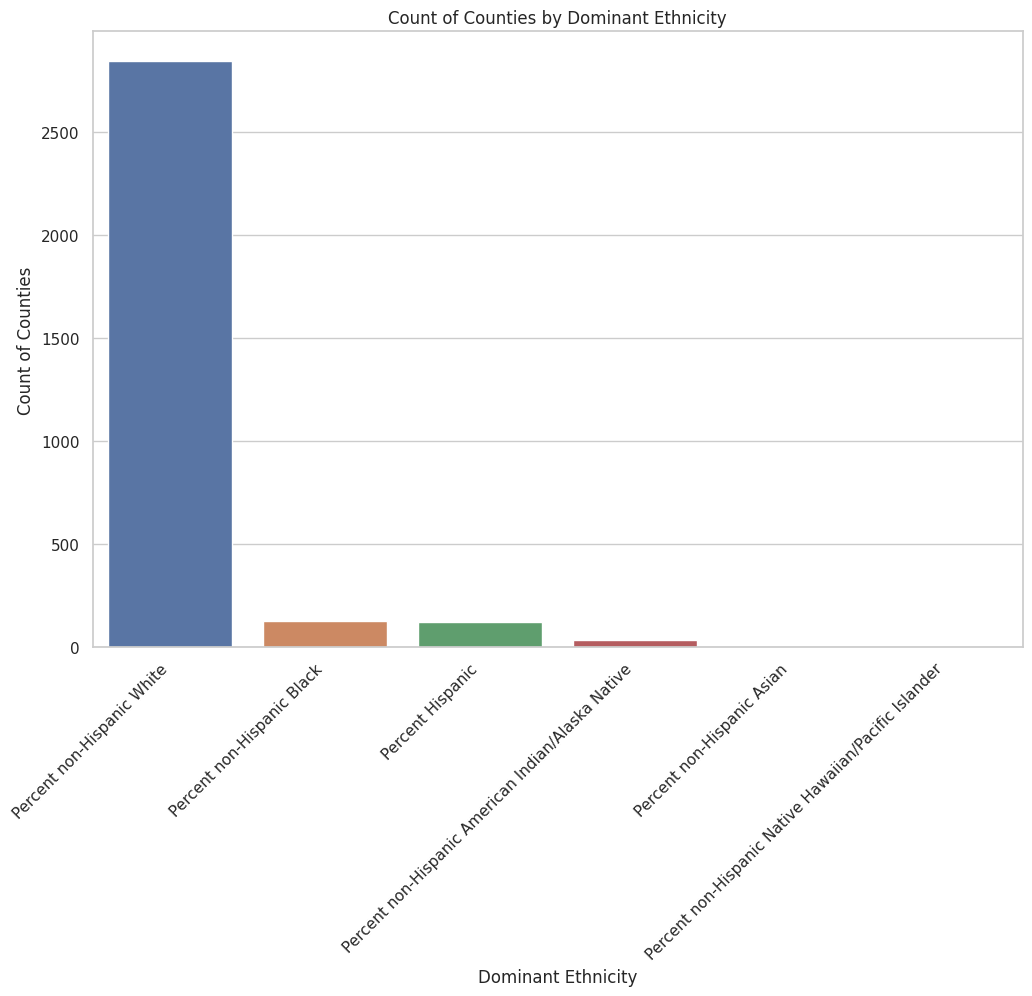

In [50]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Dominant Ethnicity', data=merged_data, order=merged_data['Dominant Ethnicity'].value_counts().index)
plt.title('Count of Counties by Dominant Ethnicity')
plt.xlabel('Dominant Ethnicity')
plt.ylabel('Count of Counties')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


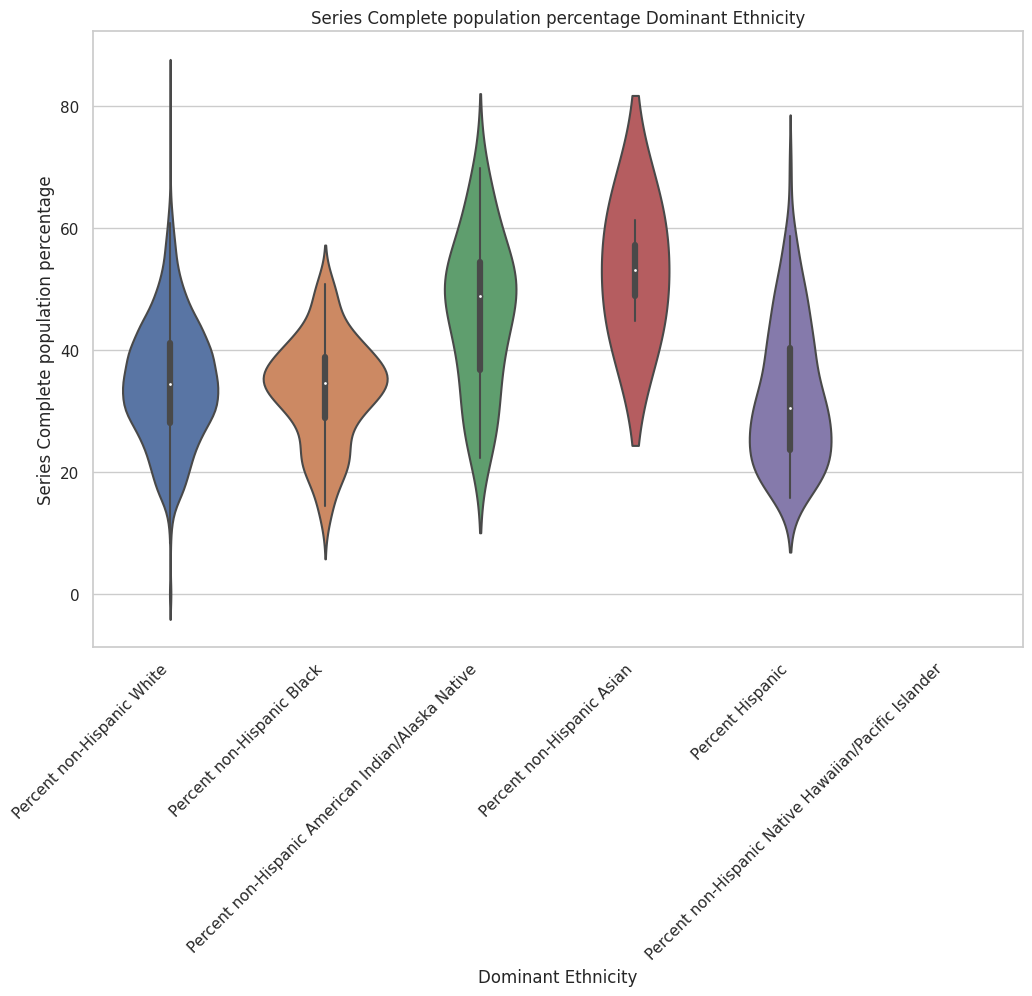

In [51]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Dominant Ethnicity',y='Series_Complete_Pop_Pct', data=merged_data)
plt.title('Series Complete population percentage Dominant Ethnicity')
plt.xlabel('Dominant Ethnicity')
plt.ylabel('Series Complete population percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [52]:
# merged_data.info()
# CVAC Level Of Concern

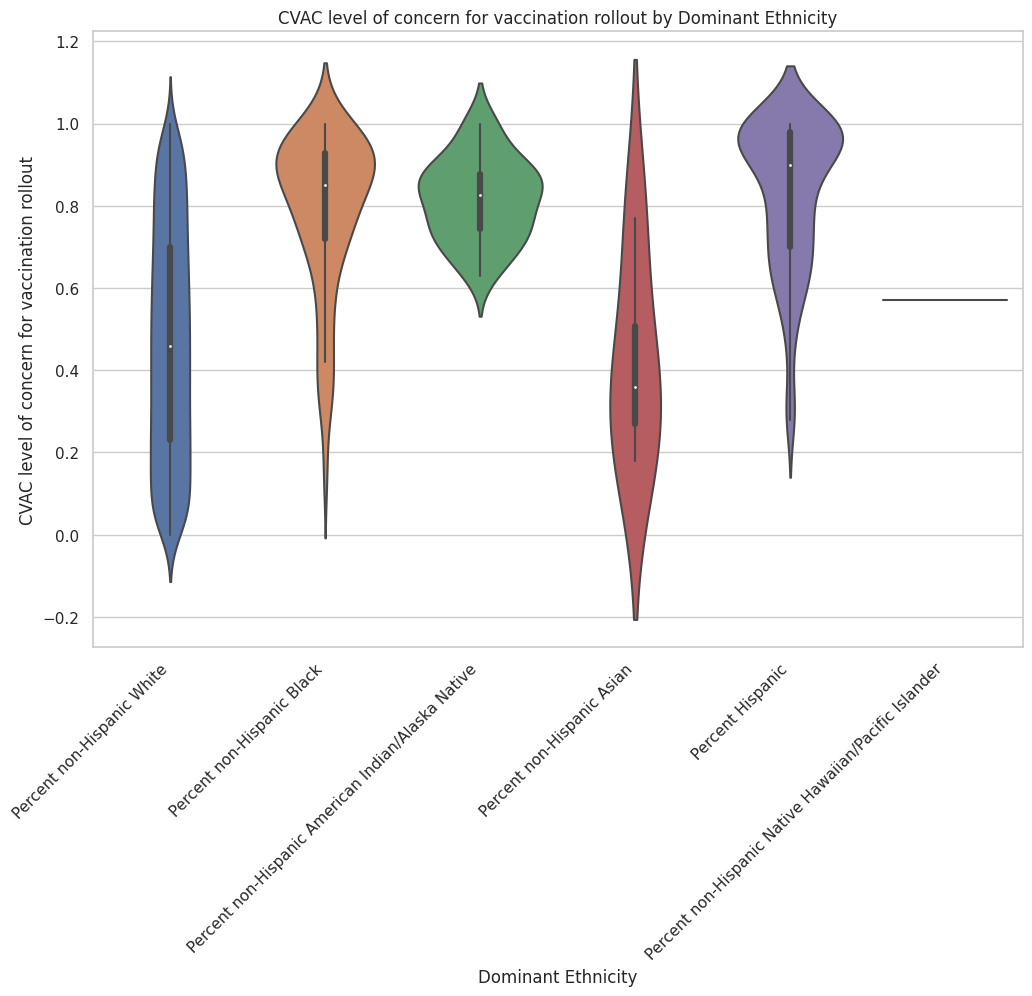

In [53]:
plt.figure(figsize=(12, 8))
sns.violinplot(y='CVAC level of concern for vaccination rollout',x='Dominant Ethnicity', data=merged_data)
plt.title('CVAC level of concern for vaccination rollout by Dominant Ethnicity')
plt.xlabel('Dominant Ethnicity')
plt.ylabel('CVAC level of concern for vaccination rollout')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [54]:
politics=pd.read_csv('politics.csv')

In [55]:
# next time first convert FIPS values into 5digit values and then filter the data

In [56]:
filtered_df = politics[politics['year'] > 2019]
idxmax_votes = filtered_df.groupby('FIPS')['candidatevotes'].idxmax()
final = filtered_df.loc[idxmax_votes]

In [57]:
final['FIPS']=final['FIPS'].astype(int)

In [58]:
final['FIPS'] = final['FIPS'].astype('object')
final['FIPS'] = final['FIPS'].apply(lambda x: str(x) if isinstance(x, int) else x)
final['FIPS'] = final['FIPS'].astype('str')


def add_zero_prefix(value):
    if len(value) == 4:
        return '0' + value
    else:
        return value

# Apply the function to the 'Column1'
final['FIPS'] = final['FIPS'].apply(add_zero_prefix)

print("\nDataFrame with '0' added to values of length 4:")
# print(covid.info())


DataFrame with '0' added to values of length 4:


In [59]:
Final_Merged_data = pd.merge(merged_data, final, left_on='FIPS Code',right_on='FIPS', how='inner')

In [60]:
Final_Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 0 to 3112
Columns: 106 entries, FIPS Code to totalvotes
dtypes: float64(88), int64(1), object(17)
memory usage: 2.5+ MB


In [61]:
Final_Merged_data.drop(columns=['FIPS_y','candidatevotes','totalvotes','state_po','State_y','year'],axis=0,inplace=True)

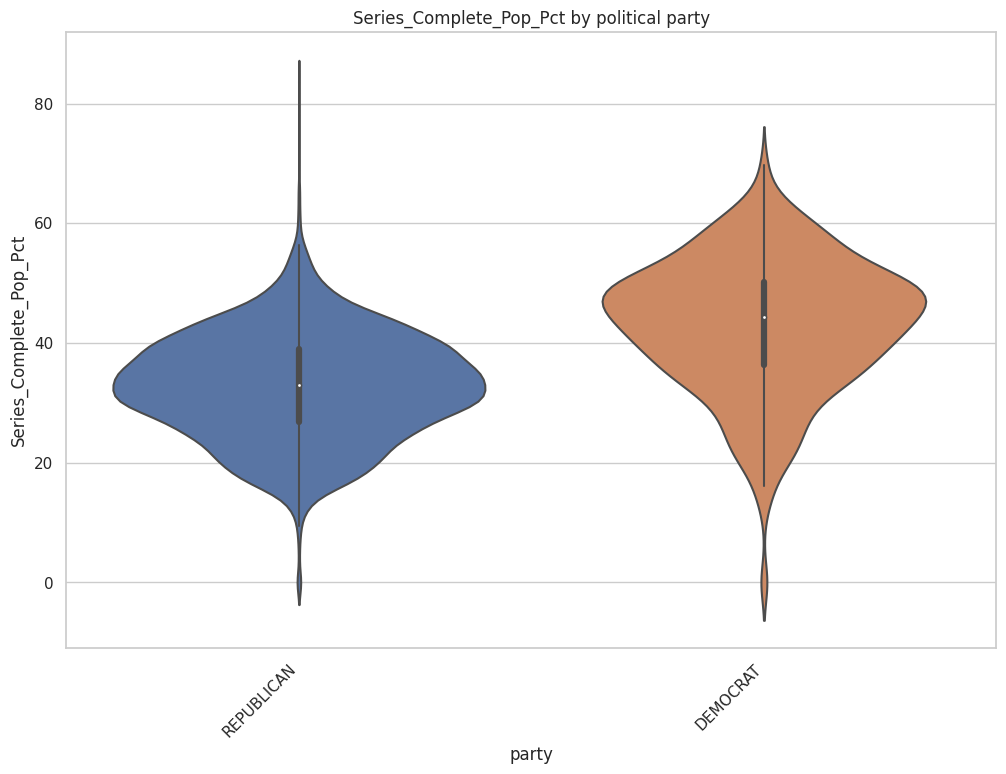

In [62]:
plt.figure(figsize=(12, 8))
sns.violinplot(y='Series_Complete_Pop_Pct',x='party', data=Final_Merged_data)
plt.title('Series_Complete_Pop_Pct by political party')
plt.xlabel('party')
plt.ylabel('Series_Complete_Pop_Pct')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


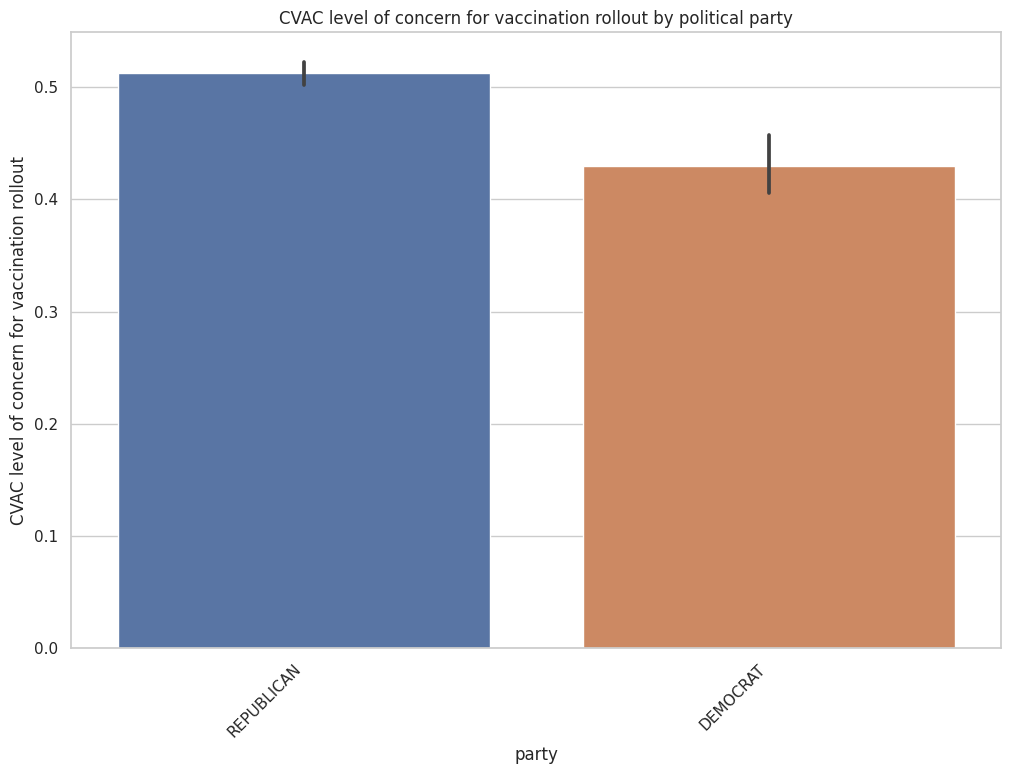

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(y='CVAC level of concern for vaccination rollout',x='party', data=Final_Merged_data)
plt.title('CVAC level of concern for vaccination rollout by political party')
plt.xlabel('party')
plt.ylabel('CVAC level of concern for vaccination rollout')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [64]:
Final_Merged_data.shape

(3113, 100)

In [66]:
Final_Merged_data[Final_Merged_data['County']=='TETON']

,FIPS Code,County Name,State_x,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary,FIPS_x,Recip_County,MMWR_week,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Series_Complete_5to17,Series_Complete_5to17Pop_Pct,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Booster_Doses,Booster_Doses_Vax_Pct,Booster_Doses_5Plus,Booster_Doses_5Plus_Vax_Pct,Booster_Doses_12Plus,Booster_Doses_12Plus_Vax_Pct,Booster_Doses_18Plus,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_50Plus,Booster_Doses_50Plus_Vax_Pct,Booster_Doses_65Plus,Booster_Doses_65Plus_Vax_Pct,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,Series_Complete_Pop_Pct_SVI,Series_Complete_5PlusPop_Pct_SVI,Series_Complete_5to17Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_5PlusPop_Pct_UR_Equity,Series_Complete_5to17Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Booster_Doses_Vax_Pct_SVI,Booster_Doses_12PlusVax_Pct_SVI,Booster_Doses_18PlusVax_Pct_SVI,Booster_Doses_65PlusVax_Pct_SVI,Booster_Doses_Vax_Pct_UR_Equity,Booster_Doses_12PlusVax_Pct_UR_Equity,Booster_Doses_18PlusVax_Pct_UR_Equity,Booster_Doses_65PlusVax_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct,Dominant Ethnicity,County,party
258,56039,"Teton County, Wyoming",WYOMING,0.20,0.27,0.15,0.11,Very Low Vulnerability,0.44,Moderate Concern,0.79,0.15,0.00,0.01,0.01,0.00,0.81,POINT (-107.55145 42.999627),WY,"MULTIPOLYGON (((-111.049091 44.132368, -111.04...","MULTIPOLYGON (((-111.044893 43.315719, -111.04...",56039,Teton County,23.51,92.91,18545.65,74.57,24883.58,95.02,18118.61,78.84,17169.56,79.65,3340.07,82.62,15812.37,67.31,21581.08,94.57,2243.85,73.09,15457.87,72.72,14633.47,73.59,2891.51,76.38,9877.74,45.56,11365.11,50.78,10247.88,49.06,9512.92,48.77,5278.74,63.98,2757.68,75.16,2961.43,50.50,1792.62,59.34,3.49,4.00,4.00,3.52,3.53,3.65,7.49,8.00,8.00,7.52,7.53,7.65,3.23,3.45,3.74,3.00,7.23,7.45,7.74,7.00,23464.00,22334.00,3070.00,20665.00,19264.00,3717.00,5318.88,23.81,5160.15,24.97,4983.12,25.87,1946.88,52.37,Percent non-Hispanic White,TETON,DEMOCRAT
546,16081,"Teton County, Idaho",IDAHO,0.20,0.27,0.13,0.13,Very Low Vulnerability,0.24,Low Concern,0.56,0.17,0.01,0.00,0.00,0.00,0.81,POINT (-114.659366 44.389073),ID,"MULTIPOLYGON (((-111.400806 43.854665, -111.40...","MULTIPOLYGON (((-116.899711 44.840609, -116.89...",16081,Teton County,23.51,92.57,6468.71,53.28,9249.46,80.85,8934.29,87.27,6238.05,67.34,1272.25,77.79,5382.15,44.33,7630.32,66.70,531.98,24.32,7394.21,72.23,5214.05,56.36,1118.70,70.08,3080.03,41.06,3540.78,4

In [ ]:
Final_Merged_data[Final_Merged_data['FIPS Code']=='48301']['Metro_status']

In [ ]:
Final_Merged_data.head(5)

In [ ]:
map_data=Final_Merged_data[['FIPS Code','Recip_County','Series_Complete_Pop_Pct','party','Social Vulnerability Index (SVI)']]

In [ ]:
# # Function to round float columns to one decimal place
# def round_to_one_decimal(row):
#     return row.apply(lambda x: round(x, 1) if isinstance(x, float) else x)

# # Apply the function to each row of the DataFrame
# Map_data = map_data.apply(round_to_one_decimal, axis=1)

# print(Map_data)

In [ ]:
map_data

In [ ]:
map_data.fillna(0,inplace=True)

In [ ]:
import folium
import pandas as pd
import json

# Load GeoJSON file representing USA county boundaries
geojson_file = ('tl_2019_us_county.geojson')  # Replace with your GeoJSON file
usa_geojson = folium.GeoJson(geojson_file)

# Read GeoJSON data
with open(geojson_file) as f:
    geo_data = json.load(f)

# Create a base map centered at the USA's approximate center using Folium
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Centered at USA coordinates



# Merge DataFrame information into GeoJSON properties based on FIPS codes
for feature in geo_data['features']:
    fips_code = feature['properties']['GEOID']
    if fips_code in map_data['FIPS Code'].values:
        Series_Complete_Pop_Pct = map_data.loc[map_data['FIPS Code'] == fips_code, 'Series_Complete_Pop_Pct'].values[0]
        feature['properties']['Series_Complete_Pop_Pct'] = Series_Complete_Pop_Pct
    else:
        feature['properties']['Series_Complete_Pop_Pct'] = None


# Add GeoJSON boundaries to the map and visualize population percentages
folium.GeoJson(
    geo_data,
    style_function=lambda feature: {
        'fillColor': 'YlGnBu',
        'fillOpacity': 0.7,
        'weight': 0.5
    },
    tooltip=folium.GeoJsonTooltip(fields=['GEOID', 'Series_Complete_Pop_Pct'], aliases=['FIPS', 'Series_complete %']),
    highlight_function=lambda x: {'weight': 3, 'fillOpacity': 0.9}
).add_to(usa_map)

# Display the map
usa_map


In [ ]:
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Centered at USA coordinates


folium.Choropleth(
    geo_data=geo_data,
    data=map_data,
    columns=['FIPS Code', 'Series_Complete_Pop_Pct'],
    key_on='feature.properties.GEOID',
    fill_color='YlGnBu',  # Choose a color scale
    fill_opacity=0.7,
    line_opacity=0.2
).add_to(usa_map)



usa_map

In [ ]:
# map_data